# ETL Section

In [1]:
# Import dependencies
import pandas as pd

In [2]:
# Import Displacement CSV data into DataFrame
displacement_df = pd.read_csv('Resources/Displacement_Risk_Demographics_2019.csv', low_memory=False)

## Data Exploration

In [3]:
# Display initial DataFrame
displacement_df.head()

,the_geom,GEOID20,COUNCIL_DI,Total Population 2020,Total Hispanic Pop 2020,Total NH White 2020,Total NH Black 2020,Total NH AM Indian AK Native 2020,Total NH Asian 2020,Total NH Native Hawaiian 2020,...,Percent Renter Occupied Units_2019,Percent Owner Occupied Units_2019,Sum of Lowmoduniverse_2019,Sum of Lowmod_2019,Percent Lowmod_2019,Median Family Income_2019,Median Home Value_2019,Median Gross Rent_2019,Quadrant_2019,Percent severely rent burdened_2019
0,MULTIPOLYGON (((-97.74903862358497 30.19139320...,4.850000e+14,2,92,76,15,0,0,0,0,...,0.38,0.62,6065,4300,0.71,56389,126800,1579,Southeast,0.26
1,MULTIPOLYGON (((-97.73502862334274 30.25968421...,4.850000e+14,3,26,17,9,0,0,0,0,...,0.46,0.54,3640,2135,0.59,57269,440100,1302,East,0.22
2,MULTIPOLYGON (((-97.7167086205077 30.282670219...,4.850000e+14,1,24,2,21,0,1,0,0,...,0.64,0.36,3055,1705,0.56,60950,398200,1248,East,0.33
3,MULTIPOLYGON (((-97.64422960245622 30.29935522...,4.850000e+14,1,43,31,4,5,0,1,0,...,0.51,0.49,8490,6780,0.80,44314,94900,1211,Northeast,0.41
4,MULTIPOLYGON (((-97.70436961526102 30.22639820...,4.850000e+14,3,13,5,2,5,0,0,0,...,0.77,0.23,10290,8985,0.87,54661,207500,924,Southeast,0.23


In [4]:
# Check shape of initial DataFrame
displacement_df.shape

(3013, 60)

In [5]:
# List columns of initial DataFrame
displacement_df.columns

Index(['the_geom', 'GEOID20', 'COUNCIL_DI', 'Total Population 2020',
       'Total Hispanic Pop 2020', 'Total NH White 2020', 'Total NH Black 2020',
       'Total NH AM Indian AK Native 2020', 'Total NH Asian 2020',
       'Total NH Native Hawaiian 2020', 'Total NH Other Races 2020',
       'Total NH Two or More Races 2020', 'Total Housing Units 2020',
       'Occupied Housing Units 2020', 'Vacant Housing Units 2020', 'GEOID20_1',
       'Total City Sponsored Affordable Units',
       'Total Citywide Affordable Units', 'TRACTCE10', 'GEOID10', 'NAME10',
       'GeoIDNum', 'GEOID_1', 'GEOID1', 'NAME_1', 'GENTRIFICATION Typology',
       'VULNERABLE Pop', 'DEMOGRAPHIC Change', 'HOUSING_MARKET',
       'DISPLACEMENT RISK', 'DESCRIPTION', 'FIPS', 'Geographic',
       'Total_Population_2019', 'White (Not Hispanic)_2019', 'POC%_2019',
       'White (Not Hispanic)%_2019', 'Population 25 and older_2019',
       'Education: Less than HS_2019', 'Education: HS Graduate_2019',
       'Education: So

In [6]:
# Check for null values in all columns
displacement_df.isnull().sum()

the_geom                                             0
GEOID20                                              0
COUNCIL_DI                                           0
Total Population 2020                                0
Total Hispanic Pop 2020                              0
Total NH White 2020                                  0
Total NH Black 2020                                  0
Total NH AM Indian AK Native 2020                    0
Total NH Asian 2020                                  0
Total NH Native Hawaiian 2020                        0
Total NH Other Races 2020                            0
Total NH Two or More Races 2020                      0
Total Housing Units 2020                             0
Occupied Housing Units 2020                          0
Vacant Housing Units 2020                            0
GEOID20_1                                            0
Total City Sponsored Affordable Units                0
Total Citywide Affordable Units                      0
TRACTCE10 

In [7]:
# Check datatypes of columns
displacement_df.dtypes

the_geom                                             object
GEOID20                                             float64
COUNCIL_DI                                            int64
Total Population 2020                                 int64
Total Hispanic Pop 2020                               int64
Total NH White 2020                                   int64
Total NH Black 2020                                   int64
Total NH AM Indian AK Native 2020                     int64
Total NH Asian 2020                                   int64
Total NH Native Hawaiian 2020                         int64
Total NH Other Races 2020                             int64
Total NH Two or More Races 2020                       int64
Total Housing Units 2020                              int64
Occupied Housing Units 2020                           int64
Vacant Housing Units 2020                             int64
GEOID20_1                                           float64
Total City Sponsored Affordable Units   

In [8]:
# Find number of unique geom shapes
displacement_df['the_geom'].nunique()

3013

## Data Cleaning

In [9]:
# Drop unnecessary columns
displacement_clean_df = displacement_df.drop(['GEOID20',
                                              'GEOID20_1', 
                                              'Total City Sponsored Affordable Units', 
                                              'Total Citywide Affordable Units', 
                                              'GEOID10',  
                                              'GEOID_1', 
                                              'GEOID1', 
                                              'DESCRIPTION',
                                              'FIPS',
                                              'Geographic', 
                                              'Total_Population_2019',
                                              'White (Not Hispanic)_2019',
                                              'POC%_2019',
                                              'Percent without Bachelors_2019', 
                                              'Percent with Bachelors_2019', 
                                              'Percent Renter Occupied Units_2019', 
                                              'Percent Owner Occupied Units_2019', 
                                              'Percent Lowmod_2019', 'TRACTCE10',
                                              'NAME10','GeoIDNum', 'NAME_1',
                                              'the_geom','COUNCIL_DI', 'White (Not Hispanic)_2019',
                                              'Population 25 and older_2019', 'Pop under 18 for whom poverty is determined_2019',
                                              'Percent Child Poverty_2019', 'Occupied Housing Units_2019',
                                              'Owner Occupied Housing Units_2019', 'Renter Occupied Housing Units_2019',
                                              'Sum of Lowmoduniverse_2019', 'Sum of Lowmod_2019',
                                              'Quadrant_2019', 'GENTRIFICATION Typology',
                                              'DISPLACEMENT RISK', 'DEMOGRAPHIC Change', 'HOUSING_MARKET'], axis=1)
displacement_clean_df.head()

,Total Population 2020,Total Hispanic Pop 2020,Total NH White 2020,Total NH Black 2020,Total NH AM Indian AK Native 2020,Total NH Asian 2020,Total NH Native Hawaiian 2020,Total NH Other Races 2020,Total NH Two or More Races 2020,Total Housing Units 2020,...,White (Not Hispanic)%_2019,Education: Less than HS_2019,Education: HS Graduate_2019,Education: Some College_2019,Education: Bachelors_2019,Population below poverty_2019,Median Family Income_2019,Median Home Value_2019,Median Gross Rent_2019,Percent severely rent burdened_2019
0,92,76,15,0,0,0,0,0,1,23,...,0.100892,1650,1307,636,270,529,56389,126800,1579,0.26
1,26,17,9,0,0,0,0,0,0,17,...,0.480611,378,485,697,1451,0,57269,440100,1302,0.22
2,24,2,21,0,1,0,0,0,0,13,...,0.508058,241,568,431,1592,50,60950,398200,1248,0.33
3,43,31,4,5,0,1,0,0,2,15,...,0.046784,2192,1634,745,567,1628,44314,94900,1211,0.41
4,13,5,2,5,0,0,0,1,0,1,...,0.180042,932,754,1138,1000,158,54661,207500,924,0.23


In [10]:
# Drop null rows
displacement_clean_df = displacement_clean_df.dropna()

In [11]:
# Check shape of cleaned DataFrame
displacement_clean_df.shape

(3013, 23)

In [12]:
# Check datatypes of columns
displacement_df.dtypes

the_geom                                             object
GEOID20                                             float64
COUNCIL_DI                                            int64
Total Population 2020                                 int64
Total Hispanic Pop 2020                               int64
Total NH White 2020                                   int64
Total NH Black 2020                                   int64
Total NH AM Indian AK Native 2020                     int64
Total NH Asian 2020                                   int64
Total NH Native Hawaiian 2020                         int64
Total NH Other Races 2020                             int64
Total NH Two or More Races 2020                       int64
Total Housing Units 2020                              int64
Occupied Housing Units 2020                           int64
Vacant Housing Units 2020                             int64
GEOID20_1                                           float64
Total City Sponsored Affordable Units   

# SQLite Connection

In [13]:
#import sqlite3

In [14]:
#conn = sqlite3.connect('gentrification_db.sqlite')

In [15]:
#displacement_clean_df.to_sql(name='displacement_risk_df', con=conn, if_exists='replace', index=False)

# Machine Learning Section

 ## Basic Setup

In [16]:
# Initial Imports
from pathlib import Path
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from imblearn.combine import SMOTEENN

## Preprocess the Dataset


In [17]:
# Make copy of input DataFrame
df_encoded = displacement_clean_df.copy()
df_encoded.head()

,Total Population 2020,Total Hispanic Pop 2020,Total NH White 2020,Total NH Black 2020,Total NH AM Indian AK Native 2020,Total NH Asian 2020,Total NH Native Hawaiian 2020,Total NH Other Races 2020,Total NH Two or More Races 2020,Total Housing Units 2020,...,White (Not Hispanic)%_2019,Education: Less than HS_2019,Education: HS Graduate_2019,Education: Some College_2019,Education: Bachelors_2019,Population below poverty_2019,Median Family Income_2019,Median Home Value_2019,Median Gross Rent_2019,Percent severely rent burdened_2019
0,92,76,15,0,0,0,0,0,1,23,...,0.100892,1650,1307,636,270,529,56389,126800,1579,0.26
1,26,17,9,0,0,0,0,0,0,17,...,0.480611,378,485,697,1451,0,57269,440100,1302,0.22
2,24,2,21,0,1,0,0,0,0,13,...,0.508058,241,568,431,1592,50,60950,398200,1248,0.33
3,43,31,4,5,0,1,0,0,2,15,...,0.046784,2192,1634,745,567,1628,44314,94900,1211,0.41
4,13,5,2,5,0,0,0,1,0,1,...,0.180042,932,754,1138,1000,158,54661,207500,924,0.23


In [18]:
# Encode target variable labels
le = LabelEncoder()
df_encoded["VULNERABLE Pop"] = le.fit_transform(df_encoded["VULNERABLE Pop"])
df_encoded.head(10)

,Total Population 2020,Total Hispanic Pop 2020,Total NH White 2020,Total NH Black 2020,Total NH AM Indian AK Native 2020,Total NH Asian 2020,Total NH Native Hawaiian 2020,Total NH Other Races 2020,Total NH Two or More Races 2020,Total Housing Units 2020,...,White (Not Hispanic)%_2019,Education: Less than HS_2019,Education: HS Graduate_2019,Education: Some College_2019,Education: Bachelors_2019,Population below poverty_2019,Median Family Income_2019,Median Home Value_2019,Median Gross Rent_2019,Percent severely rent burdened_2019
0,92,76,15,0,0,0,0,0,1,23,...,0.100892,1650,1307,636,270,529,56389,126800,1579,0.26
1,26,17,9,0,0,0,0,0,0,17,...,0.480611,378,485,697,1451,0,57269,440100,1302,0.22
2,24,2,21,0,1,0,0,0,0,13,...,0.508058,241,568,431,1592,50,60950,398200,1248,0.33
3,43,31,4,5,0,1,0,0,2,15,...,0.046784,2192,1634,745,567,1628,44314,94900,1211,0.41
4,13,5,2,5,0,0,0,1,0,1,...,0.180042,932,754,1138,1000,158,54661,207500,924,0.23
5,0,0,0,0,0,0,0,0,0,0,...,0.587016,259,417,684,2088,69,88006,338300,1319,0.26
6,236,202,19,5,0,5,0,2,3,78,...,0.323503,858,1357,602,1429,947,48047,346400,1136,0.37
7,0,0,0,0,0,0,0,0,0,0,...,0.285379,521,463,391,614,177,77829,211300,1422,0.25
8,32,15,0,13,0,0,0,3,1,11,...,0.157380,478,462,571,467,88,82902,201700,1319,0.29
9,133,86,37,3,0,3,0,0,4,36,...,0.177998,1655,1472,1009,1822,814,63689,201300,1028,0.24


In [19]:
# Segment the features from the target variable
y = df_encoded["VULNERABLE Pop"]
X = df_encoded.drop(columns="VULNERABLE Pop")
df_encoded.head(10)

,Total Population 2020,Total Hispanic Pop 2020,Total NH White 2020,Total NH Black 2020,Total NH AM Indian AK Native 2020,Total NH Asian 2020,Total NH Native Hawaiian 2020,Total NH Other Races 2020,Total NH Two or More Races 2020,Total Housing Units 2020,...,White (Not Hispanic)%_2019,Education: Less than HS_2019,Education: HS Graduate_2019,Education: Some College_2019,Education: Bachelors_2019,Population below poverty_2019,Median Family Income_2019,Median Home Value_2019,Median Gross Rent_2019,Percent severely rent burdened_2019
0,92,76,15,0,0,0,0,0,1,23,...,0.100892,1650,1307,636,270,529,56389,126800,1579,0.26
1,26,17,9,0,0,0,0,0,0,17,...,0.480611,378,485,697,1451,0,57269,440100,1302,0.22
2,24,2,21,0,1,0,0,0,0,13,...,0.508058,241,568,431,1592,50,60950,398200,1248,0.33
3,43,31,4,5,0,1,0,0,2,15,...,0.046784,2192,1634,745,567,1628,44314,94900,1211,0.41
4,13,5,2,5,0,0,0,1,0,1,...,0.180042,932,754,1138,1000,158,54661,207500,924,0.23
5,0,0,0,0,0,0,0,0,0,0,...,0.587016,259,417,684,2088,69,88006,338300,1319,0.26
6,236,202,19,5,0,5,0,2,3,78,...,0.323503,858,1357,602,1429,947,48047,346400,1136,0.37
7,0,0,0,0,0,0,0,0,0,0,...,0.285379,521,463,391,614,177,77829,211300,1422,0.25
8,32,15,0,13,0,0,0,3,1,11,...,0.157380,478,462,571,467,88,82902,201700,1319,0.29
9,133,86,37,3,0,3,0,0,4,36,...,0.177998,1655,1472,1009,1822,814,63689,201300,1028,0.24


In [20]:
# Drop Target Variable from DataFrame
df_encoded = df_encoded.drop(["VULNERABLE Pop"], axis=1)
df_encoded.head()

,Total Population 2020,Total Hispanic Pop 2020,Total NH White 2020,Total NH Black 2020,Total NH AM Indian AK Native 2020,Total NH Asian 2020,Total NH Native Hawaiian 2020,Total NH Other Races 2020,Total NH Two or More Races 2020,Total Housing Units 2020,...,White (Not Hispanic)%_2019,Education: Less than HS_2019,Education: HS Graduate_2019,Education: Some College_2019,Education: Bachelors_2019,Population below poverty_2019,Median Family Income_2019,Median Home Value_2019,Median Gross Rent_2019,Percent severely rent burdened_2019
0,92,76,15,0,0,0,0,0,1,23,...,0.100892,1650,1307,636,270,529,56389,126800,1579,0.26
1,26,17,9,0,0,0,0,0,0,17,...,0.480611,378,485,697,1451,0,57269,440100,1302,0.22
2,24,2,21,0,1,0,0,0,0,13,...,0.508058,241,568,431,1592,50,60950,398200,1248,0.33
3,43,31,4,5,0,1,0,0,2,15,...,0.046784,2192,1634,745,567,1628,44314,94900,1211,0.41
4,13,5,2,5,0,0,0,1,0,1,...,0.180042,932,754,1138,1000,158,54661,207500,924,0.23


In [21]:
# Check datatypes of columns
df_encoded.dtypes

Total Population 2020                    int64
Total Hispanic Pop 2020                  int64
Total NH White 2020                      int64
Total NH Black 2020                      int64
Total NH AM Indian AK Native 2020        int64
Total NH Asian 2020                      int64
Total NH Native Hawaiian 2020            int64
Total NH Other Races 2020                int64
Total NH Two or More Races 2020          int64
Total Housing Units 2020                 int64
Occupied Housing Units 2020              int64
Vacant Housing Units 2020                int64
White (Not Hispanic)%_2019             float64
Education: Less than HS_2019             int64
Education: HS Graduate_2019              int64
Education: Some College_2019             int64
Education: Bachelors_2019                int64
Population below poverty_2019            int64
Median Family Income_2019                int64
Median Home Value_2019                   int64
Median Gross Rent_2019                   int64
Percent sever

In [22]:
# Use the train_test_split function to create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
# Check shape of training subset
X_train.shape

(2259, 22)

In [23]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# View scaled training data
X_train_scaled

array([[-0.4804838 , -0.39975421, -0.4787331 , ..., -0.31605415,
        -0.98065087, -0.26137463],
       [-0.4804838 , -0.39975421, -0.4787331 , ..., -1.40205438,
         0.0257483 ,  1.06141523],
       [-0.25990195, -0.34523757, -0.17488365, ...,  0.4339548 ,
        -3.57045139, -1.94492536],
       ...,
       [-0.4804838 , -0.39975421, -0.4787331 , ...,  0.23411165,
        -0.4573233 , -0.26137463],
       [-0.4804838 , -0.39975421, -0.4787331 , ..., -0.05171978,
        -0.55125389,  0.9411616 ],
       [-0.35376657, -0.31408521, -0.37744995, ...,  0.23411165,
        -0.4573233 , -0.26137463]])

In [25]:
# Test for class imbalance of target variable
Counter(y_train)

Counter({1: 1650, 0: 609})

 ## Basic Random Forest Model

In [26]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=128,
                                random_state=1)

In [27]:
# Fit our model with the training data
rf_model = rf_model.fit(X_train_scaled, y_train)

In [28]:
# Make predictions using the test data
y_pred = rf_model.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


### Assess Performance of Basic Random Forest Model

In [29]:
# Deermine accuracy score of the model
rf_score = balanced_accuracy_score(y_test, y_pred)
print(rf_score)

1.0


In [30]:
# Generate Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(matrix, index=["Actual 0", "Actual 1"],
                        columns=["Predicted 0", "Predicted 1"])
display(matrix_df)

,Predicted 0,Predicted 1
Actual 0,203,0
Actual 1,0,551


In [31]:
# Generate Classification Report
report = classification_report_imbalanced(y_test, y_pred)
print(report)

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       203
          1       1.00      1.00      1.00      1.00      1.00      1.00       551

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       754



### Rank the Importance of Features

In [32]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([9.80151837e-04, 4.03604518e-03, 1.37404401e-03, 5.36951650e-04,
       1.08729214e-04, 6.43429416e-04, 1.53762840e-05, 6.68942695e-05,
       7.03943053e-04, 1.29100009e-03, 9.74517875e-04, 2.52551225e-04,
       1.35942307e-01, 1.38131843e-01, 1.40133399e-01, 3.10104262e-02,
       4.37460739e-02, 1.61756201e-01, 1.49315203e-01, 8.23611340e-02,
       8.38788762e-02, 2.27409014e-02])

In [33]:
# Sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.16175620131646032, 'Population below poverty_2019'),
 (0.14931520301423848, 'Median Family Income_2019'),
 (0.14013339912470482, 'Education: HS Graduate_2019'),
 (0.13813184332264694, 'Education: Less than HS_2019'),
 (0.1359423072890714, 'White (Not Hispanic)%_2019'),
 (0.08387887622292828, 'Median Gross Rent_2019'),
 (0.08236113402569994, 'Median Home Value_2019'),
 (0.043746073914775425, 'Education: Bachelors_2019'),
 (0.031010426214401275, 'Education: Some College_2019'),
 (0.02274090144630034, 'Percent severely rent burdened_2019'),
 (0.004036045182709704, 'Total Hispanic Pop 2020'),
 (0.001374044008475934, 'Total NH White 2020'),
 (0.0012910000938486717, 'Total Housing Units 2020'),
 (0.0009801518373226954, 'Total Population 2020'),
 (0.0009745178752973104, 'Occupied Housing Units 2020'),
 (0.0007039430526184711, 'Total NH Two or More Races 2020'),
 (0.0006434294159726448, 'Total NH Asian 2020'),
 (0.0005369516496564801, 'Total NH Black 2020'),
 (0.00025255122528599076, 'Vaca

### SHAP Values Summary Plot for Feature Importance

In [40]:
# Calculate SHAP Values for RF features
shap.initjs()
rf_shap_explainer = shap.KernelExplainer(rf_model.predict, X_test_scaled)
rf_shap_values = rf_shap_explainer.shap_values(X_test_scaled, nsamples=100)

Using 754 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/754 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

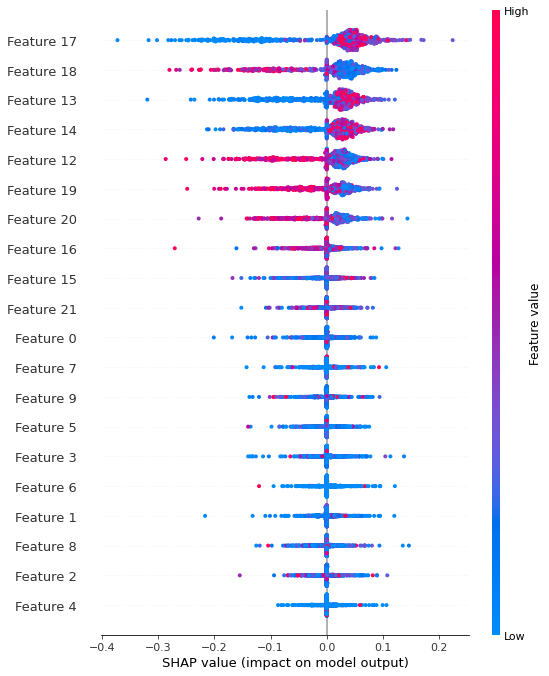

In [41]:
# Create SHAP Summary Plot
shap.summary_plot(rf_shap_values, X_test_scaled)

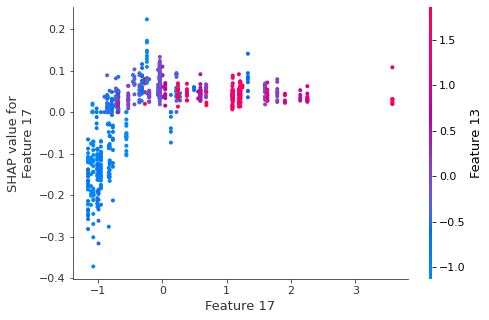

In [43]:
# Create SHAP Dependence Plot
shap.dependence_plot("Feature 17", rf_shap_values, X_test_scaled)

## Random Forest Model with PCA

### Perform PCA

In [52]:
# Initialize PCA model
pca = PCA(n_components=1)

In [53]:
# Get two principal components for our scaled dataset
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

In [54]:
# Transform PCA data to a DataFrame
df_X_pca = pd.DataFrame(data=X_train_pca, columns=["principal component 1"])
df_X_pca.head()

,principal component 1
0,-1.023755
1,-0.721849
2,0.101527
3,-0.990347
4,-1.001414


In [55]:
# Fetch the explained variance
print(pca.explained_variance_ratio_)

[0.35533112]


### Perform RF Analysis

In [56]:
# Create a random forest classifier
rf_model_pca = RandomForestClassifier(n_estimators=128,
                                random_state=1)

In [57]:
# Fit our model with the pca training data
rf_model_pca = rf_model_pca.fit(X_train_pca, y_train)

In [58]:
# Make predictions using the pca test data
y_pred = rf_model_pca.predict(X_test_pca)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1,0
1,1,1
2,0,1
3,1,1
4,0,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


### Assess Performance of Random Forest Model with PCA

In [59]:
# Deermine accuracy score of the model
rfpca_score = balanced_accuracy_score(y_test, y_pred)
print(rfpca_score)

0.5667617319159969


In [60]:
# Generate Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(matrix, index=["Actual 0", "Actual 1"],
                        columns=["Predicted 0", "Predicted 1"])
display(matrix_df)

,Predicted 0,Predicted 1
Actual 0,82,121
Actual 1,149,402


In [61]:
# Generate Classification Report
report = classification_report_imbalanced(y_test, y_pred)
print(report)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.35      0.40      0.73      0.38      0.54      0.29       203
          1       0.77      0.73      0.40      0.75      0.54      0.30       551

avg / total       0.66      0.64      0.49      0.65      0.54      0.30       754



## Basic Random Forest Model - Combination Sampling

In [62]:
# Use SMOTEEN to correct class imbalance with resampling
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Test for class imbalance of target variable
Counter(y_resampled)

Counter({0: 2201, 1: 2201})

In [63]:
# Fit our model with the resampled training data
rf_model_smote = RandomForestClassifier(n_estimators=128,
                                random_state=1)
rf_model_smote.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=128, random_state=1)

In [64]:
# Make predictions using the unscaled test data
y_pred = rf_model_smote.predict(X_test)

### Assess Performance of SMOTEEN Random Forest Model

In [65]:
# Calculate the Balanced Accuracy Score
rfsmote_score = balanced_accuracy_score(y_test, y_pred)
print(rfsmote_score)

1.0


In [66]:
# Generate Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(matrix, index=["Actual 0", "Actual 1"],
                        columns=["Predicted 0", "Predicted 1"])
display(matrix_df)

,Predicted 0,Predicted 1
Actual 0,203,0
Actual 1,0,551


In [67]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       203
          1       1.00      1.00      1.00      1.00      1.00      1.00       551

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       754



# Results Summary

In [68]:
# Generate summary DataFrame
results_data = {'Balanced Accuracy Score' : [rf_score, rfpca_score, rfsmote_score]}
results_table = pd.DataFrame(data=results_data, index=["Basic RF", "RF with PCA", "RF with SMOTEEN"])
display(results_table)

,Balanced Accuracy Score
Basic RF,1.000000
RF with PCA,0.566762
RF with SMOTEEN,1.000000
